## Importación de datos y exploración inicial de variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer

In [ ]:
flight_data = pd.read_csv('/content/flights_sample_3m.csv')

In [ ]:
flight_data.shape

(3000000, 32)

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [ ]:
flight_data.sample(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2426440,2020-03-14,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4309,SLC,"Salt Lake City, UT",GJT,"Grand Junction, CO",...,0.0,63.0,47.0,34.0,216.0,NaN,NaN,NaN,NaN,NaN
898911,2020-07-03,Envoy Air,Envoy Air: MQ,MQ,20398,3665,DFW,"Dallas/Fort Worth, TX",XNA,"Fayetteville, AR",...,0.0,72.0,77.0,46.0,280.0,NaN,NaN,NaN,NaN,NaN
2630401,2020-05-14,JetBlue Airways,JetBlue Airways: B6,B6,20409,1039,BOS,"Boston, MA",AUS,"Austin, TX",...,0.0,255.0,242.0,221.0,1698.0,NaN,NaN,NaN,NaN,NaN
1005157,2019-07-04,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,48,HNL,"Honolulu, HI",OAK,"Oakland, CA",...,0.0,325.0,311.0,290.0,2409.0,NaN,NaN,NaN,NaN,NaN
1766407,2023-08-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1197,BOS,"Boston, MA",BNA,"Nashville, TN",...,0.0,176.0,168.0,145.0,942.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
flight_data[['ELAPSED_TIME','CRS_ELAPSED_TIME','AIR_TIME']].sample(5)

,ELAPSED_TIME,CRS_ELAPSED_TIME,AIR_TIME
2930978,56.0,63.0,31.0
488012,154.0,154.0,136.0
2247473,55.0,61.0,24.0
519199,113.0,120.0,76.0
1367334,76.0,85.0,65.0


In [ ]:
flight_data.describe(include='object').transpose()

,count,unique,top,freq
FL_DATE,3000000,1704,2019-07-25,2379
AIRLINE,3000000,18,Southwest Airlines Co.,576470
AIRLINE_DOT,3000000,18,Southwest Airlines Co.: WN,576470
AIRLINE_CODE,3000000,18,WN,576470
ORIGIN,3000000,380,ATL,153556
ORIGIN_CITY,3000000,373,"Chicago, IL",157368
DEST,3000000,380,ATL,153569
DEST_CITY,3000000,373,"Chicago, IL",158087
CANCELLATION_CODE,79140,4,B,28772


In [ ]:
flight_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DOT_CODE,3000000.0,19976.294095,377.284619,19393.0,19790.0,19930.0,20368.0,20452.0
FL_NUMBER,3000000.0,2511.535519,1747.258040,1.0,1051.0,2152.0,3797.0,9562.0
CRS_DEP_TIME,3000000.0,1327.061984,485.878854,1.0,915.0,1320.0,1730.0,2359.0
DEP_TIME,2922385.0,1329.775913,499.310052,1.0,916.0,1323.0,1739.0,2400.0
DEP_DELAY,2922356.0,10.123326,49.251835,-90.0,-6.0,-2.0,6.0,2966.0
TAXI_OUT,2921194.0,16.643046,9.192901,1.0,11.0,14.0,19.0,184.0
WHEELS_OFF,2921194.0,1352.360989,500.872687,1.0,931.0,1336.0,1752.0,2400.0
WHEELS_ON,2920056.0,1462.499569,527.236818,1.0,1049.0,1501.0,1908.0,2400.0
TAXI_IN,2920056.0,7.678982,6.269639,1.0,4.0,6.0,9.0,249.0
CRS_ARR_TIME,3000000.0,1490.560665,511.547566,1.0,1107.0,1516.0,1919.0,2400.0


## Limpieza de datos (Tratamiento de valores nulos)


In [ ]:
# Cantidade valores nulos
flight_data.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

,0
CANCELLATION_CODE,2920860
DELAY_DUE_WEATHER,2466137
DELAY_DUE_NAS,2466137
DELAY_DUE_SECURITY,2466137
DELAY_DUE_LATE_AIRCRAFT,2466137
DELAY_DUE_CARRIER,2466137
AIR_TIME,86198
ELAPSED_TIME,86198
ARR_DELAY,86198
TAXI_IN,79944


In [ ]:
# Calcular porcentaje de nulos por columna
missing_data = flight_data.isnull().mean() * 100

# DataFrame "Porcentaje de missing values"
missing_table = (
    pd.DataFrame({
        "variables": missing_data.index,
        "porcentaje_nulos": missing_data.values
    })
    .query("porcentaje_nulos > 0")   # filtra solo columnas con nulos
    .sort_values(by="porcentaje_nulos", ascending=False)
)

print(missing_table)

                  variables  porcentaje_nulos
21        CANCELLATION_CODE         97.362000
28        DELAY_DUE_WEATHER         82.204567
29            DELAY_DUE_NAS         82.204567
30       DELAY_DUE_SECURITY         82.204567
31  DELAY_DUE_LATE_AIRCRAFT         82.204567
27        DELAY_DUE_CARRIER         82.204567
25                 AIR_TIME          2.873267
24             ELAPSED_TIME          2.873267
19                ARR_DELAY          2.873267
16                  TAXI_IN          2.664800
15                WHEELS_ON          2.664800
18                 ARR_TIME          2.664733
13                 TAXI_OUT          2.626867
14               WHEELS_OFF          2.626867
12                DEP_DELAY          2.588133
11                 DEP_TIME          2.587167
23         CRS_ELAPSED_TIME          0.000467


### Visualización de valores nulos

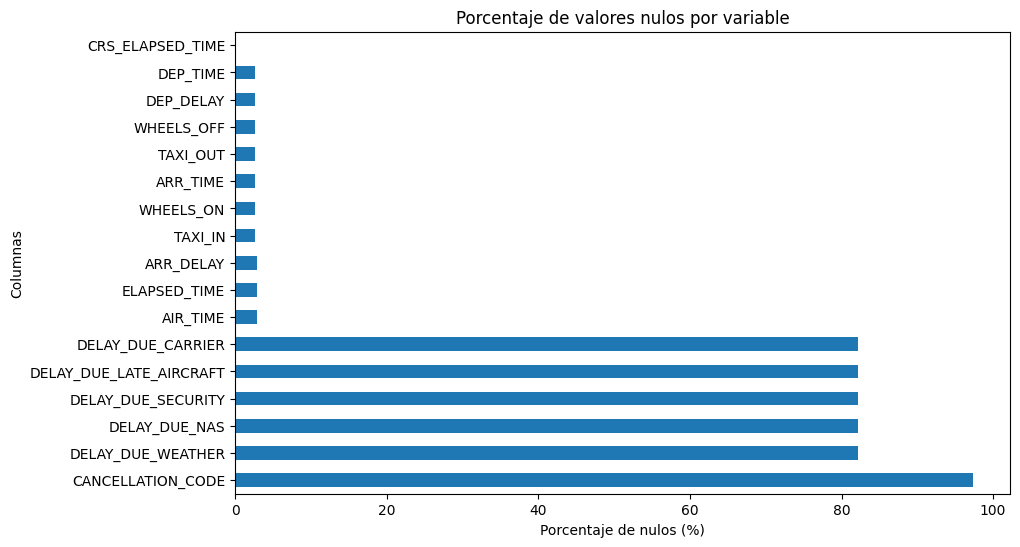

In [ ]:
# Gráfico de barras de columnas con nulos
missing_table.plot(
    x="variables",
    y="porcentaje_nulos",
    kind="barh",
    figsize=(10,6),
    legend=False
)

plt.title("Porcentaje de valores nulos por variable")
plt.xlabel("Porcentaje de nulos (%)")
plt.ylabel("Columnas")
plt.show()

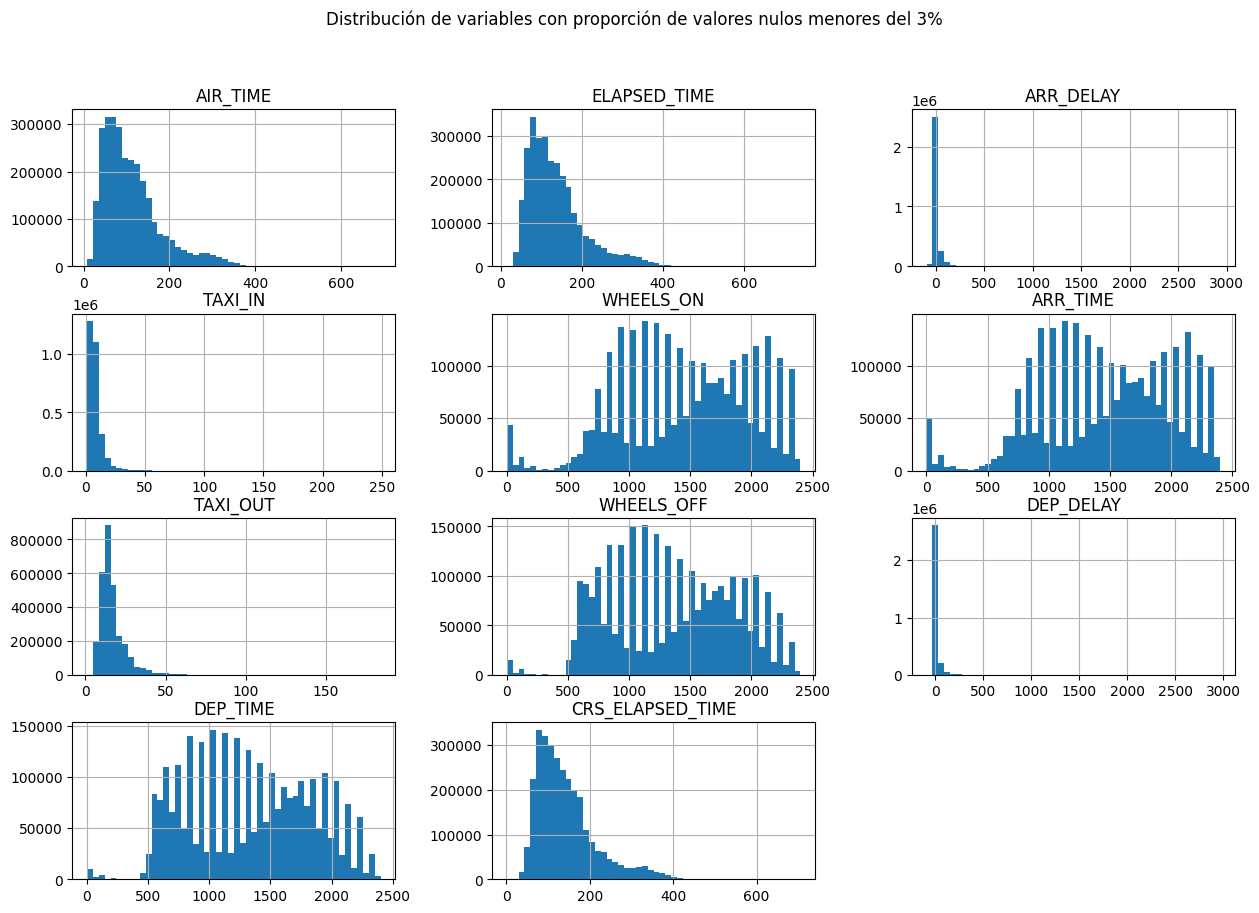

In [ ]:
cols_3per_nul = ["AIR_TIME", "ELAPSED_TIME", "ARR_DELAY", "TAXI_IN", "WHEELS_ON", "ARR_TIME",
        "TAXI_OUT", "WHEELS_OFF", "DEP_DELAY", "DEP_TIME", "CRS_ELAPSED_TIME"]

flight_data[cols_3per_nul].hist(bins=50, figsize=(15,10))
plt.suptitle("Distribución de variables con proporción de valores nulos menores del 3%")
plt.show()

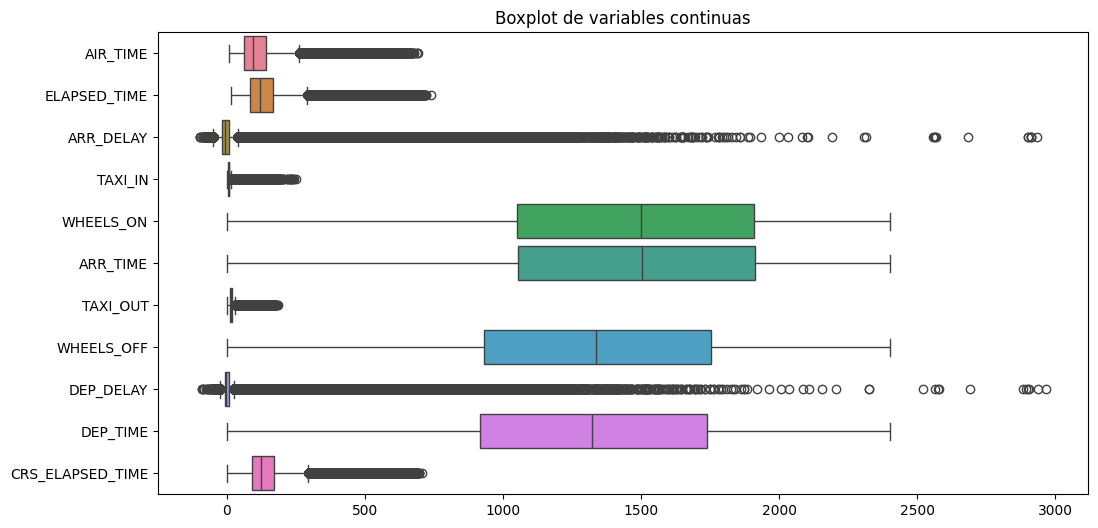

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=flight_data[cols_3per_nul], orient="h")
plt.title("Boxplot de variables continuas")
plt.show()

In [ ]:
# Aplicar visualizaciones de las varibles con mayor número de valores nulos
# DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_SECURITY,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER
# DELAY_DUE_NAS

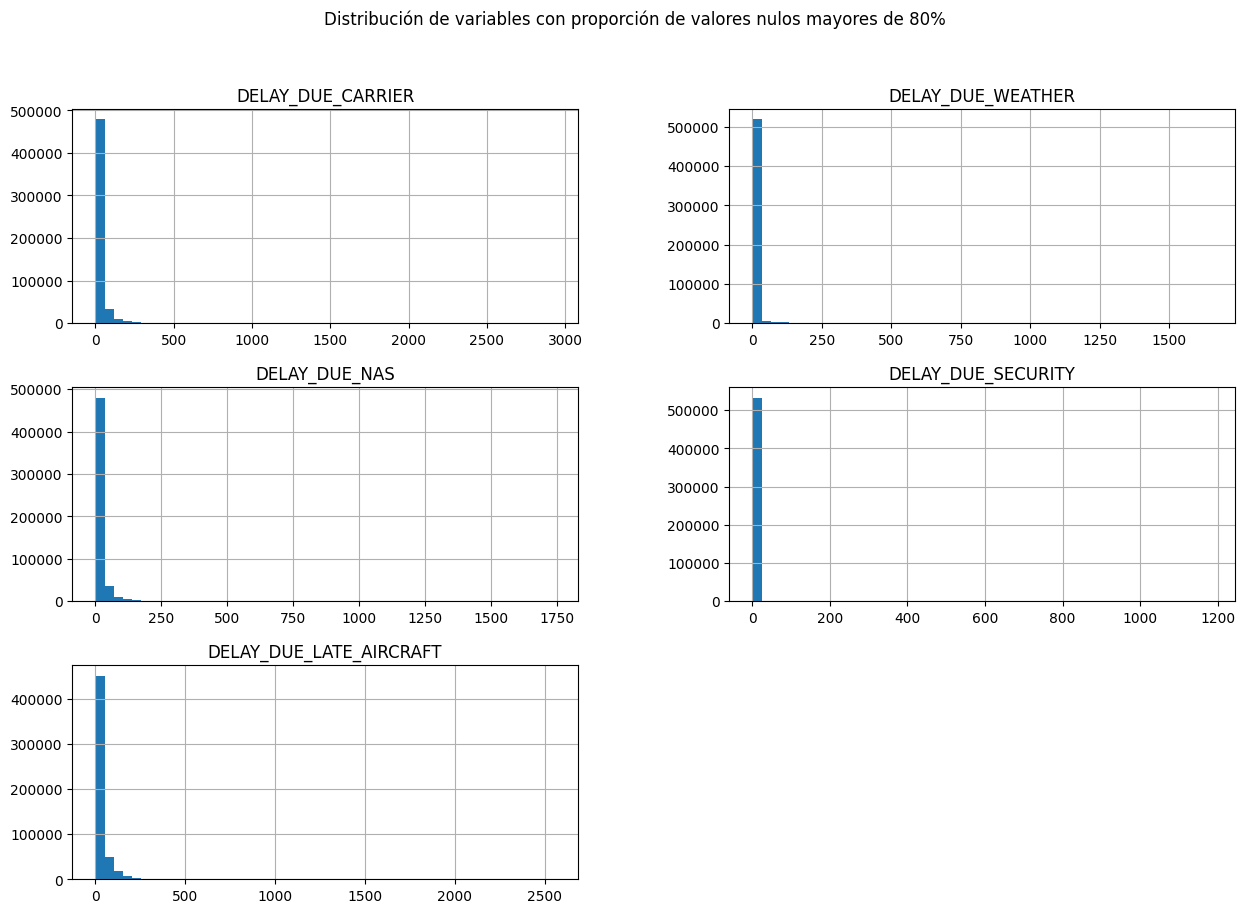

In [ ]:
cols_80per_nul = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
                 "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

flight_data[cols_80per_nul].hist(bins=50, figsize=(15,10))
plt.suptitle("Distribución de variables con proporción de valores nulos mayores de 80%")
plt.show()

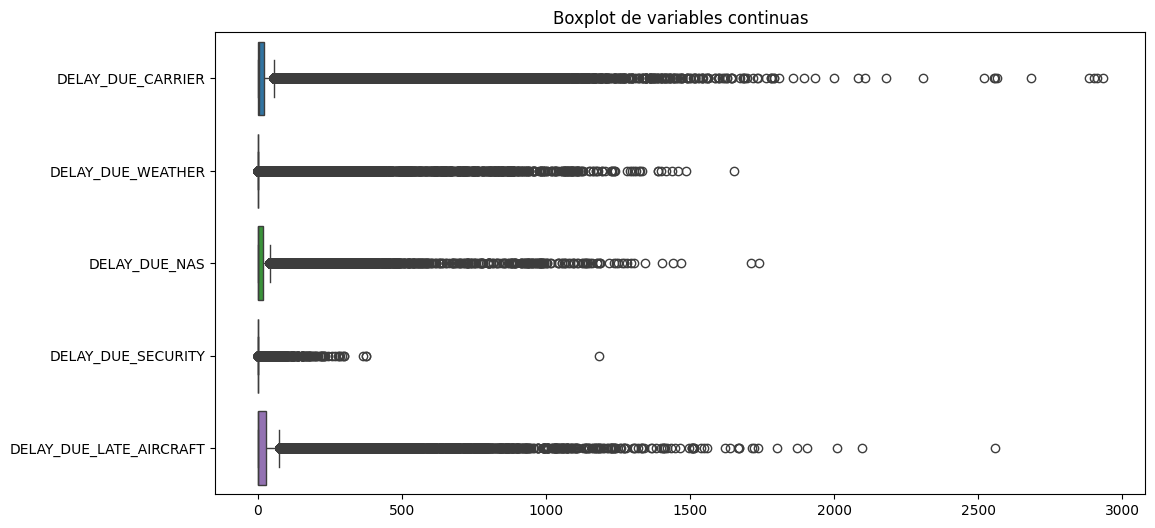

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=flight_data[cols_80per_nul], orient="h")
plt.title("Boxplot de variables continuas")
plt.show()

In [ ]:
# Aplcar segunda visualización de las variables con mayor número de valores nulos

### Imputación de datos

In [ ]:
# Se eliminan variables CANCELLATION_CODE", "CANCELLED ya que no se considera predicción por cancelación
flight_data = flight_data.drop(columns=["CANCELLATION_CODE", "CANCELLED"])

In [ ]:
from sklearn.impute import SimpleImputer
# Imputación a variables con valores de la moda
most_frequent_cols = ["WHEELS_ON", "ARR_TIME","WHEELS_OFF","DEP_TIME"]

# Imputación a variables con valores de la media
median_cols = ["AIR_TIME", "ELAPSED_TIME", "ARR_DELAY", "TAXI_IN",
             "TAXI_OUT", "DEP_DELAY","CRS_ELAPSED_TIME"]

# Imputación a variables explicativas
xpl_cols = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
               "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

# Imputadores
mean_imputer = SimpleImputer(strategy="most_frequent")
median_imputer = SimpleImputer(strategy="median")
xpl_imputer = SimpleImputer(strategy="constant", fill_value=0)

# Aplicar imputación
flight_data[median_cols] = median_imputer.fit_transform(flight_data[median_cols])
flight_data[most_frequent_cols] = mean_imputer.fit_transform(flight_data[most_frequent_cols])
flight_data[xpl_cols] = xpl_imputer.fit_transform(flight_data[xpl_cols])

In [ ]:
cols_retraso = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
               "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

# Crear una nueva columna que indique si el vuelo tuvo al menos un tipo de retraso
flight_data['HAS_DELAY'] = (flight_data[cols_retraso] > 0).any(axis=1)

# Contar el número de vuelos con al menos un retraso
num_vuelos_con_retraso = flight_data['HAS_DELAY'].sum()

print(f"Número de vuelos con uno o más casos de retraso: {num_vuelos_con_retraso}")

Número de vuelos con uno o más casos de retraso: 533863


In [ ]:
flight_data.shape

(3000000, 31)

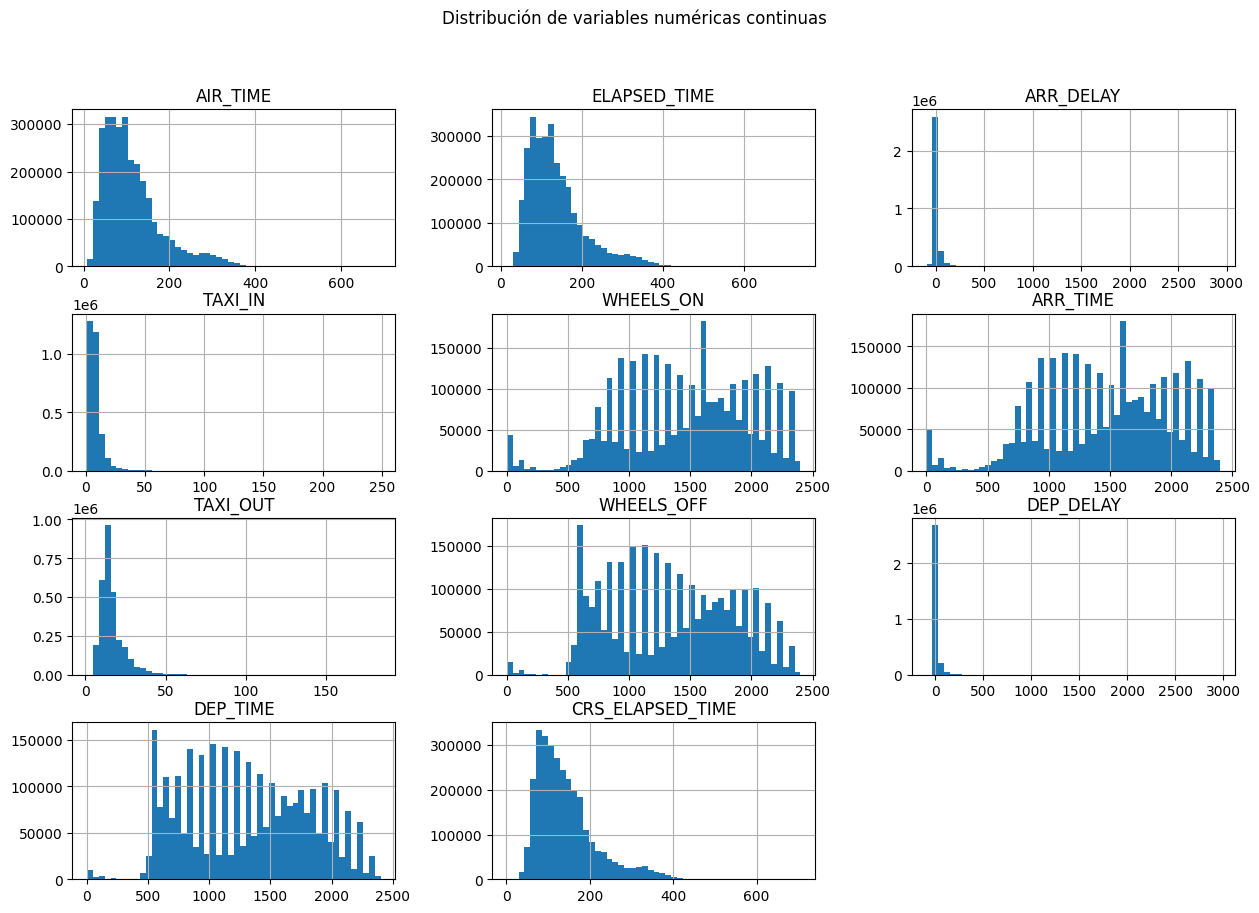

In [ ]:
flight_data[cols_3per_nul].hist(bins=50, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas continuas")
plt.show()

# Número de vuelos que presentaron uno o más casos de retrasos

In [ ]:
cols_retraso = ["DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
               "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT"]

# Crear una nueva columna que indique si el vuelo tuvo al menos un tipo de retraso
flight_data['HAS_DELAY'] = (flight_data[cols_retraso] > 0).any(axis=1)

# Contar el número de vuelos con al menos un retraso
num_vuelos_con_retraso = flight_data['HAS_DELAY'].sum()

print(f"Número de vuelos con uno o más casos de retraso: {num_vuelos_con_retraso}")

Número de vuelos con uno o más casos de retraso: 533863


In [ ]:
airline_delay = flight_data.groupby('AIRLINE')['HAS_DELAY'].sum().sort_values()

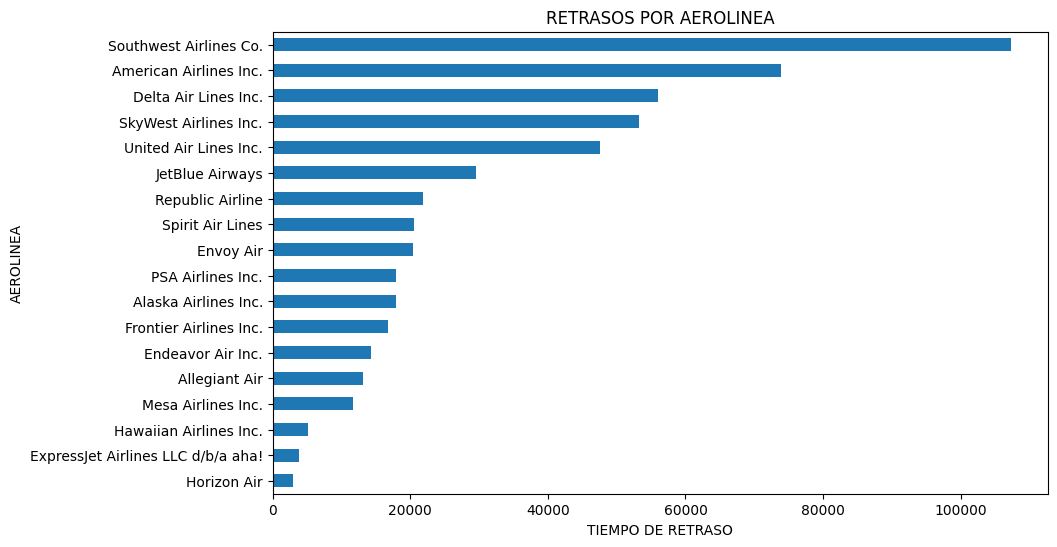

In [ ]:
# Gráfico de barras de columnas con nulos
airline_delay.plot(
    x="AIRLINE",
    y="HAS_DELAY",
    kind="barh",
    figsize=(10,6),
    legend=False
)

plt.title("RETRASOS POR AEROLINEA")
plt.xlabel("TIEMPO DE RETRASO")
plt.ylabel("AEROLINEA")
plt.show()

In [ ]:
total_vuelos = flight_data.shape[0]
porcentaje_retrasos = (num_vuelos_con_retraso / total_vuelos) * 100

print(f"El porcentaje de vuelos con al menos un tipo de retraso es: {porcentaje_retrasos:.2f}%")

El porcentaje de vuelos con al menos un tipo de retraso es: 17.80%


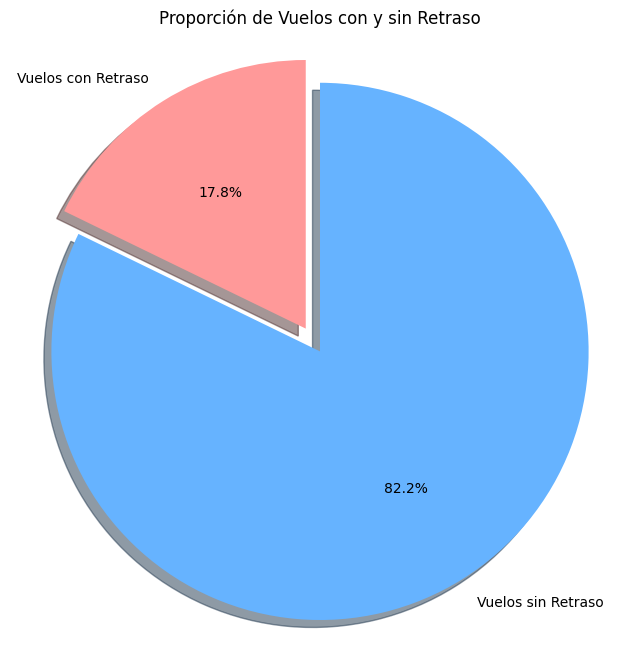

In [ ]:
# Calcular el número de vuelos sin retraso
num_vuelos_sin_retraso = total_vuelos - num_vuelos_con_retraso

# Crear etiquetas y tamaños para el gráfico de pastel
labels = ['Vuelos con Retraso', 'Vuelos sin Retraso']
sizes = [num_vuelos_con_retraso, num_vuelos_sin_retraso]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # destacar el primer slice (vuelos con retraso)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Asegura que el pastel sea un círculo.
plt.title('Proporción de Vuelos con y sin Retraso')
plt.show()

/tmp/ipython-input-3504063262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_delay_by_type.index, y=total_delay_by_type.values, palette='viridis')


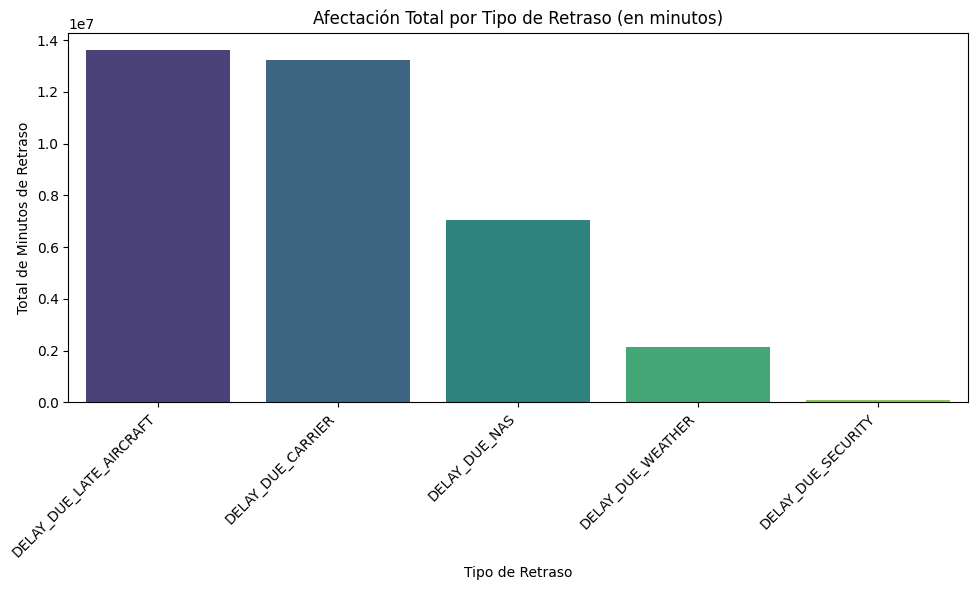

In [ ]:
delay_types = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

total_delay_by_type = flight_data[delay_types].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_delay_by_type.index, y=total_delay_by_type.values, palette='viridis')
plt.title('Afectación Total por Tipo de Retraso (en minutos)')
plt.xlabel('Tipo de Retraso')
plt.ylabel('Total de Minutos de Retraso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

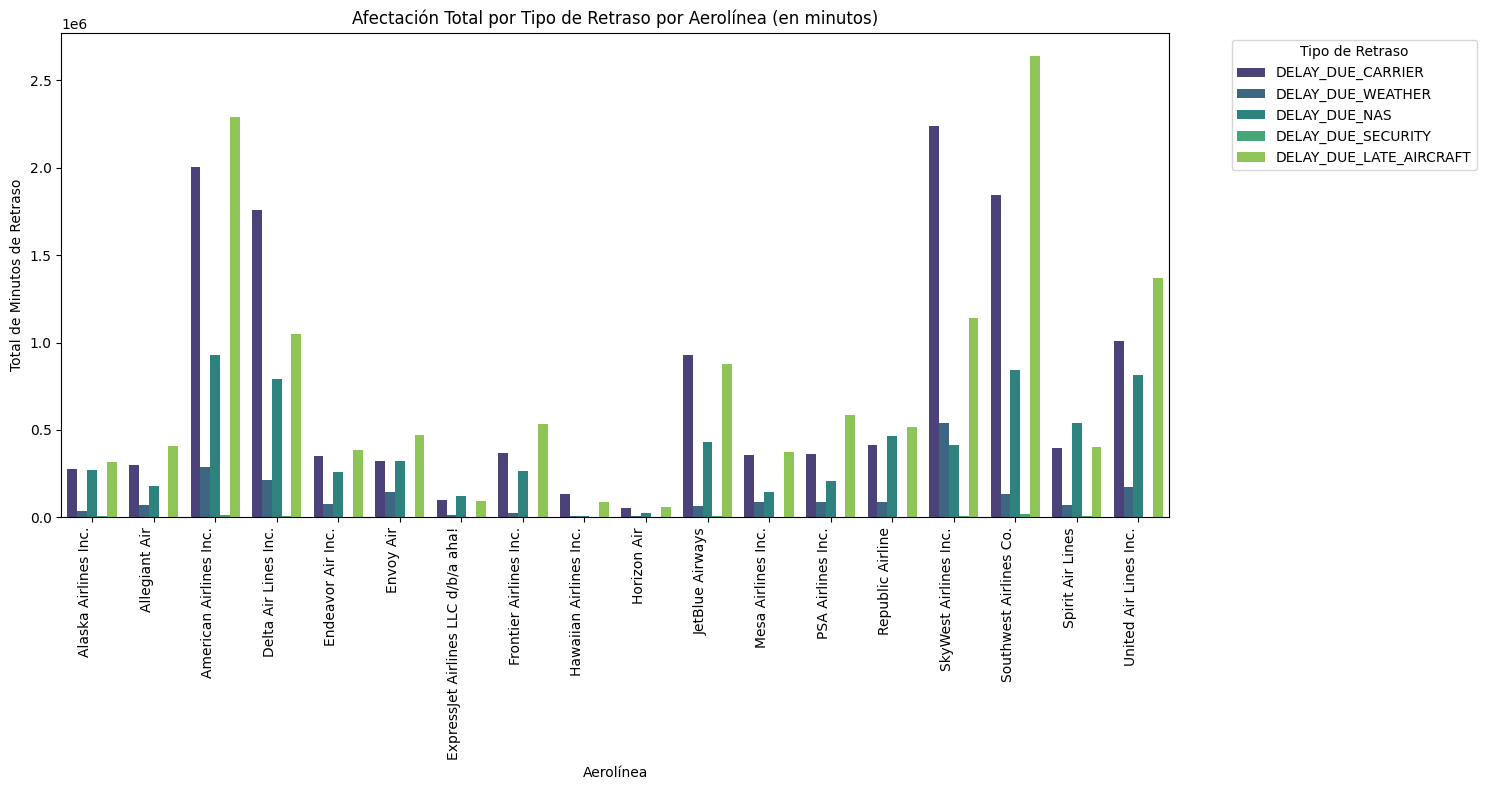

In [ ]:
delay_types = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Agrupar por aerolínea y sumar los minutos de cada tipo de retraso
airline_delay_types = flight_data.groupby('AIRLINE')[delay_types].sum().reset_index()

# Transformar el DataFrame a un formato largo para facilitar el gráfico de barras agrupado
airline_delay_melted = airline_delay_types.melt(id_vars='AIRLINE', var_name='Tipo de Retraso', value_name='Total Minutos de Retraso')

plt.figure(figsize=(15, 8))
sns.barplot(data=airline_delay_melted, x='AIRLINE', y='Total Minutos de Retraso', hue='Tipo de Retraso', palette='viridis')
plt.title('Afectación Total por Tipo de Retraso por Aerolínea (en minutos)')
plt.xlabel('Aerolínea')
plt.ylabel('Total de Minutos de Retraso')
plt.xticks(rotation=90, ha='right') # Rotar etiquetas para mejor legibilidad
plt.legend(title='Tipo de Retraso', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda para evitar solapamiento
plt.tight_layout()
plt.show()

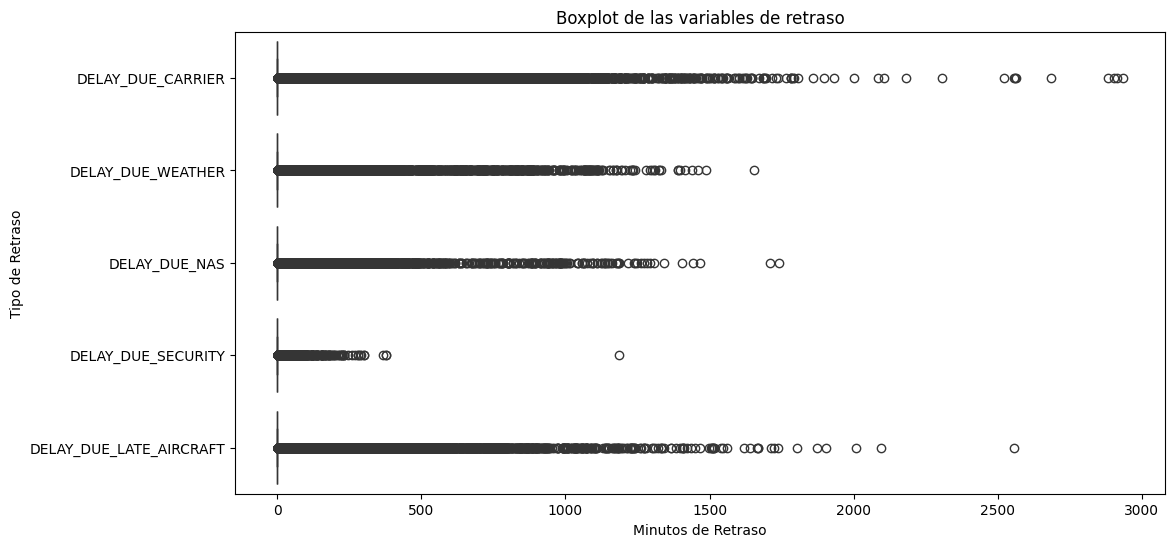

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=flight_data[delay_types], orient="h", palette='viridis')
plt.title("Boxplot de las variables de retraso")
plt.xlabel("Minutos de Retraso")
plt.ylabel("Tipo de Retraso")
plt.show()

In [ ]:
delay_types = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

total_delay_by_type_minutes = flight_data[delay_types].sum().sort_values(ascending=False)
total_delay_by_type_hours = total_delay_by_type_minutes / 60

print("Afectación Total por Tipo de Retraso (en horas):")
print(total_delay_by_type_hours.sort_values(ascending=False))

Afectación Total por Tipo de Retraso (en horas):
DELAY_DUE_LATE_AIRCRAFT    226636.250000
DELAY_DUE_CARRIER          220299.333333
DELAY_DUE_NAS              117136.016667
DELAY_DUE_WEATHER           35459.716667
DELAY_DUE_SECURITY           1298.450000
dtype: float64


/tmp/ipython-input-4128561936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_delay_by_type_hours.index, y=total_delay_by_type_hours.values, palette='viridis')


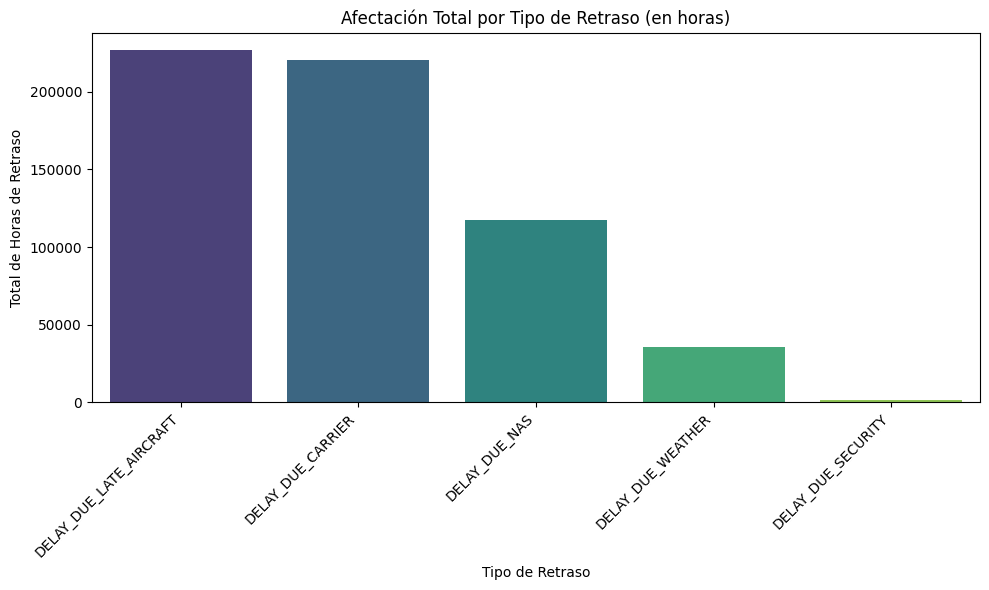

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_delay_by_type_hours.index, y=total_delay_by_type_hours.values, palette='viridis')
plt.title('Afectación Total por Tipo de Retraso (en horas)')
plt.xlabel('Tipo de Retraso')
plt.ylabel('Total de Horas de Retraso')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
delay_types = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Crear una copia del DataFrame o solo de las columnas relevantes si es un nuevo df
# En este caso, asumiré que se quiere un nuevo DataFrame con estas columnas transformadas.
# Si se desea agregar al flight_data original, se puede ajustar.

delay_binary_df = pd.DataFrame()

for col in delay_types:
    delay_binary_df[col + '_BINARY'] = (flight_data[col] > 0).astype(int)

# También podemos incluir la columna 'HAS_DELAY' que ya creamos si es relevante
if 'HAS_DELAY' in flight_data.columns:
    delay_binary_df['HAS_DELAY'] = flight_data['HAS_DELAY'].astype(int)

print("Primeras 5 filas del nuevo DataFrame con variables de retraso binarias:")
display(delay_binary_df.head())

Primeras 5 filas del nuevo DataFrame con variables de retraso binarias:


,DELAY_DUE_CARRIER_BINARY,DELAY_DUE_WEATHER_BINARY,DELAY_DUE_NAS_BINARY,DELAY_DUE_SECURITY_BINARY,DELAY_DUE_LATE_AIRCRAFT_BINARY,HAS_DELAY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,1,0,0,1
4,0,0,0,0,0,0


In [ ]:
delay_types = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

delay_binary_df = pd.DataFrame()

# Añadir la columna 'AIRLINE' y 'FL_NUMBER' primero
delay_binary_df['AIRLINE'] = flight_data['AIRLINE']
delay_binary_df['FL_NUMBER'] = flight_data['FL_NUMBER']

for col in delay_types:
    delay_binary_df[col + '_BINARY'] = (flight_data[col] > 0).astype(int)

# Incluir la columna 'HAS_DELAY' si ya existe y es relevante
if 'HAS_DELAY' in flight_data.columns:
    delay_binary_df['HAS_DELAY'] = flight_data['HAS_DELAY'].astype(int)

print("Primeras 5 filas del nuevo DataFrame con 'AIRLINE', 'FL_NUMBER' y variables de retraso binarias:")
display(delay_binary_df.head())

Primeras 5 filas del nuevo DataFrame con 'AIRLINE', 'FL_NUMBER' y variables de retraso binarias:


,AIRLINE,FL_NUMBER,DELAY_DUE_CARRIER_BINARY,DELAY_DUE_WEATHER_BINARY,DELAY_DUE_NAS_BINARY,DELAY_DUE_SECURITY_BINARY,DELAY_DUE_LATE_AIRCRAFT_BINARY,HAS_DELAY
0,United Air Lines Inc.,1562,0,0,0,0,0,0
1,Delta Air Lines Inc.,1149,0,0,0,0,0,0
2,United Air Lines Inc.,459,0,0,0,0,0,0
3,Delta Air Lines Inc.,2295,0,0,1,0,0,1
4,Spirit Air Lines,407,0,0,0,0,0,0


In [ ]:
delay_binary_df.shape

(3000000, 8)

In [ ]:
delay_binary_cols = ['DELAY_DUE_CARRIER_BINARY', 'DELAY_DUE_WEATHER_BINARY', 'DELAY_DUE_NAS_BINARY', 'DELAY_DUE_SECURITY_BINARY', 'DELAY_DUE_LATE_AIRCRAFT_BINARY']

# Sumar las columnas binarias de retraso para cada vuelo
delay_binary_df['MULTIPLE_DELAYS_COUNT'] = delay_binary_df[delay_binary_cols].sum(axis=1)

# Contar cuántos vuelos tienen más de un tipo de retraso
flights_with_multiple_delays = delay_binary_df[delay_binary_df['MULTIPLE_DELAYS_COUNT'] > 1].shape[0]

print(f"Número de vuelos con más de un tipo de retraso: {flights_with_multiple_delays}")

print("\nPrimeras 5 filas del DataFrame con el conteo de múltiples retrasos:")
display(delay_binary_df.head())

Número de vuelos con más de un tipo de retraso: 260699

Primeras 5 filas del DataFrame con el conteo de múltiples retrasos:


,AIRLINE,FL_NUMBER,DELAY_DUE_CARRIER_BINARY,DELAY_DUE_WEATHER_BINARY,DELAY_DUE_NAS_BINARY,DELAY_DUE_SECURITY_BINARY,DELAY_DUE_LATE_AIRCRAFT_BINARY,HAS_DELAY,MULTIPLE_DELAYS_COUNT
0,United Air Lines Inc.,1562,0,0,0,0,0,0,0
1,Delta Air Lines Inc.,1149,0,0,0,0,0,0,0
2,United Air Lines Inc.,459,0,0,0,0,0,0,0
3,Delta Air Lines Inc.,2295,0,0,1,0,0,1,1
4,Spirit Air Lines,407,0,0,0,0,0,0,0


In [ ]:
delay_binary_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FL_NUMBER,3000000.0,2511.535519,1747.258040,1.0,1051.0,2152.0,3797.0,9562.0
DELAY_DUE_CARRIER_BINARY,3000000.0,0.098984,0.298640,0.0,0.0,0.0,0.0,1.0
DELAY_DUE_WEATHER_BINARY,3000000.0,0.010476,0.101815,0.0,0.0,0.0,0.0,1.0
DELAY_DUE_NAS_BINARY,3000000.0,0.085492,0.279613,0.0,0.0,0.0,0.0,1.0
DELAY_DUE_SECURITY_BINARY,3000000.0,0.000920,0.030312,0.0,0.0,0.0,0.0,1.0
DELAY_DUE_LATE_AIRCRAFT_BINARY,3000000.0,0.086338,0.280863,0.0,0.0,0.0,0.0,1.0
HAS_DELAY,3000000.0,0.177954,0.382474,0.0,0.0,0.0,0.0,1.0
MULTIPLE_DELAYS_COUNT,3000000.0,0.282210,0.667780,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Contar la ocurrencia de cada número de tipos de retraso
conteo_tipos_retraso = delay_binary_df['MULTIPLE_DELAYS_COUNT'].value_counts().sort_index()

print("Número de vuelos por cantidad de tipos de retraso:")
display(conteo_tipos_retraso)

Número de vuelos por cantidad de tipos de retraso:


,count
MULTIPLE_DELAYS_COUNT,
0,2466137
1,273164
2,208842
3,51647
4,210


/tmp/ipython-input-671675362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_retrasos_positivos.index, y=conteo_retrasos_positivos.values, palette='viridis')


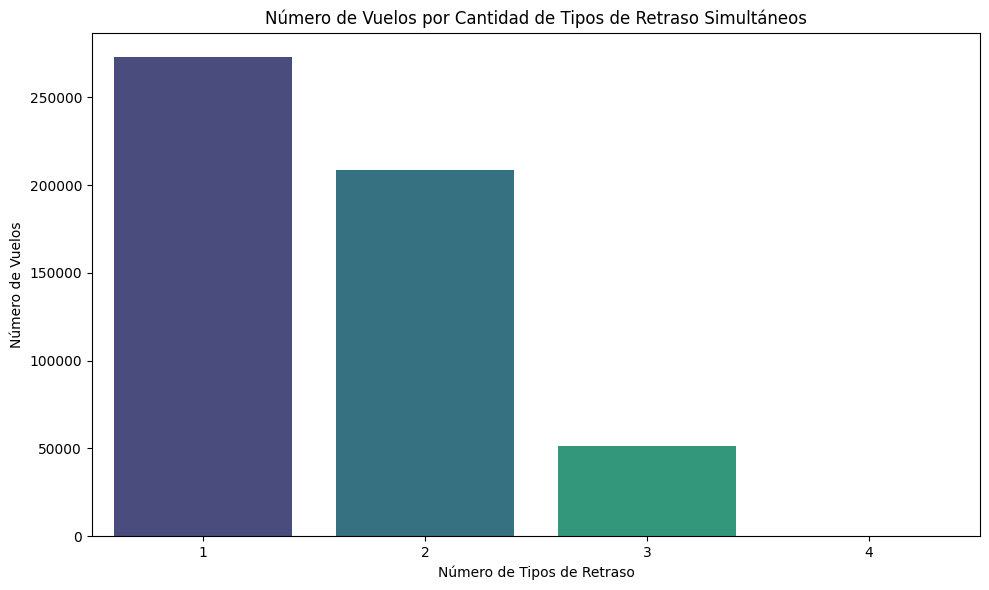

In [ ]:
# Filtrar solo los vuelos con al menos un tipo de retraso para el gráfico
conteo_retrasos_positivos = conteo_tipos_retraso[conteo_tipos_retraso.index > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_retrasos_positivos.index, y=conteo_retrasos_positivos.values, palette='viridis')
plt.title('Número de Vuelos por Cantidad de Tipos de Retraso Simultáneos')
plt.xlabel('Número de Tipos de Retraso')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()